<a href="https://colab.research.google.com/github/SamridhiParihar/Machine-Learning-Projects/blob/main/Interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

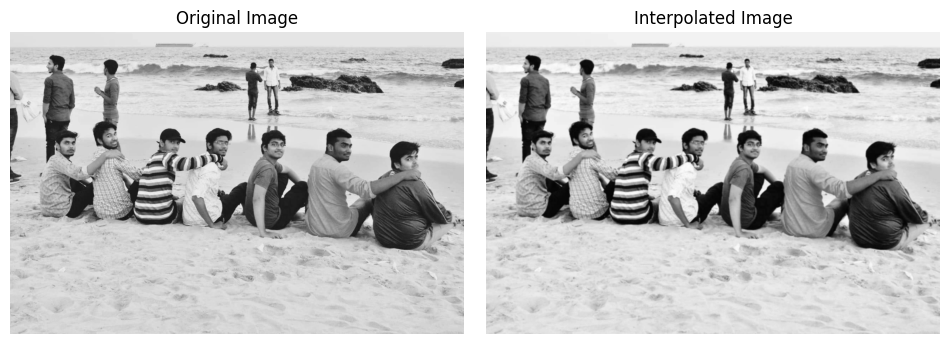

In [1]:
#Interpolation
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the original grayscale image
image_path = '/content/c.jpeg'  # Replace with the path to your image
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if original_image is None:
    print("Error: Unable to load the image.")
else:
    # Define the zoom factor
    zoom_factor = 2  # Adjust as needed

    # Get the dimensions of the original image
    original_height, original_width = original_image.shape

    # Calculate the dimensions of the zoomed image
    zoomed_height = original_height * zoom_factor
    zoomed_width = original_width * zoom_factor

    # Create an empty array for the zoomed image
    zoomed_image = np.zeros((zoomed_height, zoomed_width), dtype=np.uint8)

    # Perform interpolation involving average values manually
    for i in range(zoomed_height):
        for j in range(zoomed_width):
            # Find the corresponding coordinates in the original image
            x_original = int(j / zoom_factor)
            y_original = int(i / zoom_factor)

            # Calculate the average of pixel values from a neighborhood (e.g., 2x2) in the original image
            x1 = max(0, x_original - 1)
            x2 = min(original_width - 1, x_original + 1)
            y1 = max(0, y_original - 1)
            y2 = min(original_height - 1, y_original + 1)

            neighborhood_pixels = original_image[y1:y2 + 1, x1:x2 + 1]
            interpolated_value = int(np.mean(neighborhood_pixels))

            # Assign the interpolated value to the zoomed image
            zoomed_image[i, j] = interpolated_value

    # Create a figure with two subplots to display images side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Display the original grayscale image on the left subplot
    axes[0].imshow(original_image, cmap='gray')
    axes[0].set_title('Original Image')

    # Display the manually interpolated grayscale image on the right subplot
    axes[1].imshow(zoomed_image, cmap='gray')
    axes[1].set_title('Interpolated Image')

    # Remove axis labels and adjust spacing
    for ax in axes:
        ax.axis('off')

    # Adjust subplot spacing
    plt.subplots_adjust(wspace=0.05)

    # Show the plot
    plt.show()